# Importing Libraries and Datasets

In [ ]:
import sklearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score , precision_score , recall_score, roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Preprocessing and visualization

#Data cleaning

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df = df.fillna(df['bmi'].mean())

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
np.unique(df["work_type"])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [ ]:
df=df.iloc[: , 1:]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


#Plot and visualization

Count Plots

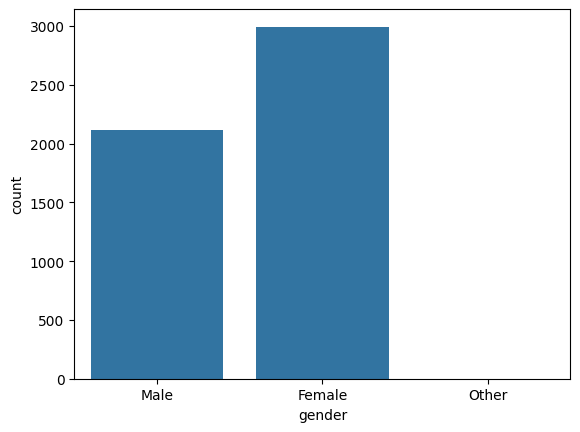

In [ ]:
sns.countplot( x= 'gender', data = df)
plt.show()

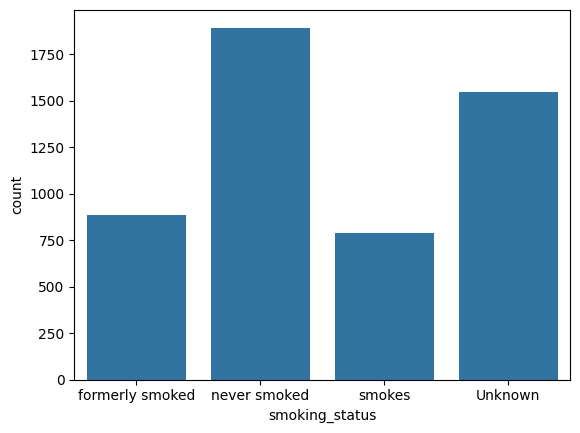

In [ ]:
sns.countplot(x= 'smoking_status' , data =df)
plt.show()

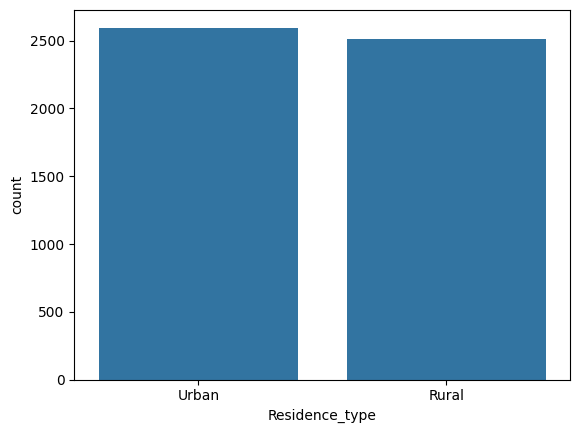

In [ ]:
sns.countplot(x= 'Residence_type' , data = df)
plt.show()

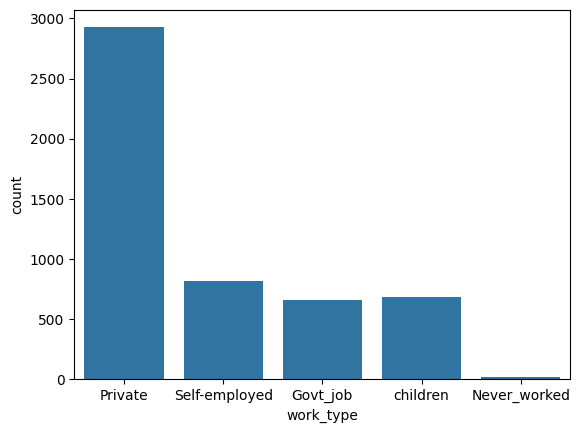

In [ ]:
sns.countplot(x='work_type',data = df)
plt.show()

#Distribution of categorical Features

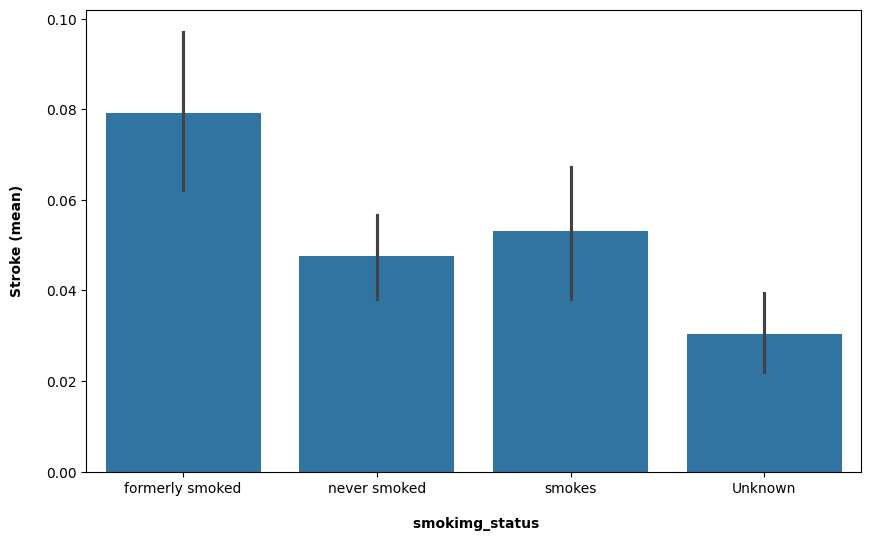

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x ="smoking_status", y="stroke" , data =df)
plt.xlabel("\n smokimg_status" , fontweight="bold")
plt.ylabel("Stroke (mean)\n", fontweight="bold")
plt.show()

# Distribution of categorical features with stroke

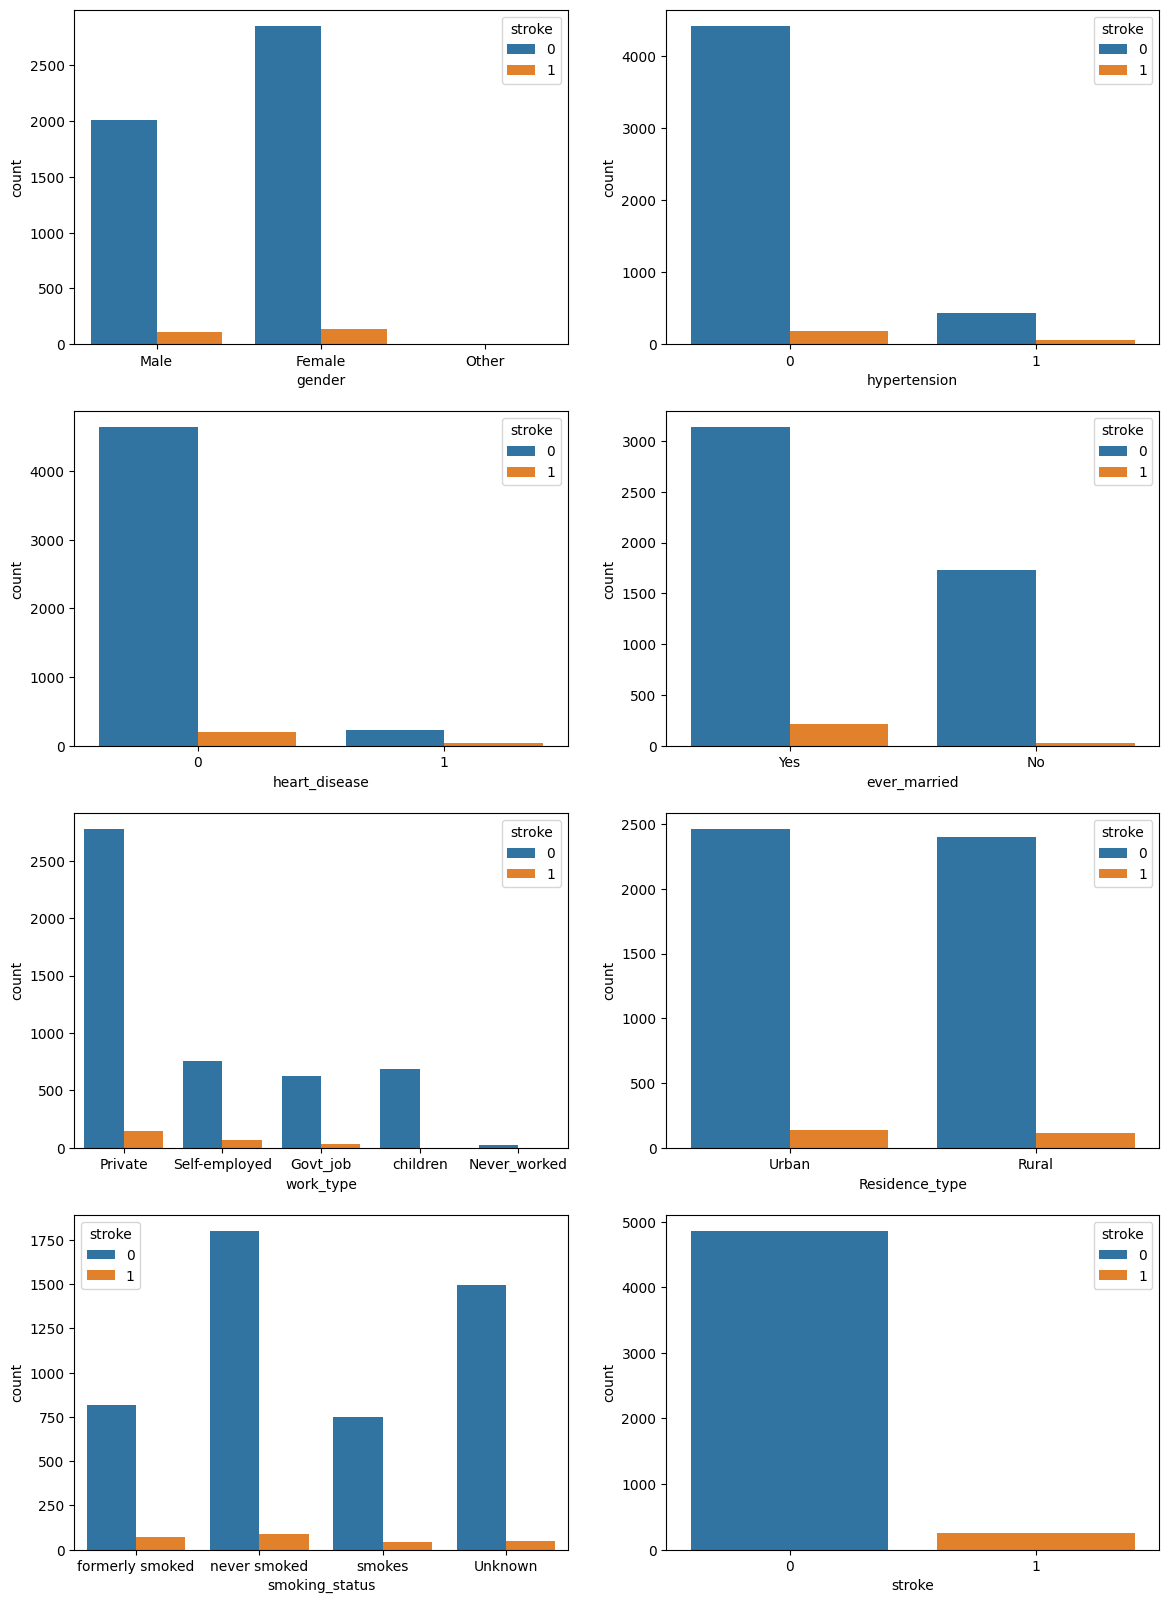

In [ ]:
some_attri = ['gender', 'hypertension' , 'heart_disease' , 'ever_married', 'work_type', 'Residence_type' , 'smoking_status', 'stroke']
fig , axis = plt.subplots(4,2 , figsize=(14,20))
axis = axis.flatten()
for i , col_name in enumerate(some_attri):
  sns.countplot(x = col_name , data = df , ax=axis[i], hue = df['stroke'])
plt.show()

# Density distribution of continuos features with stroke

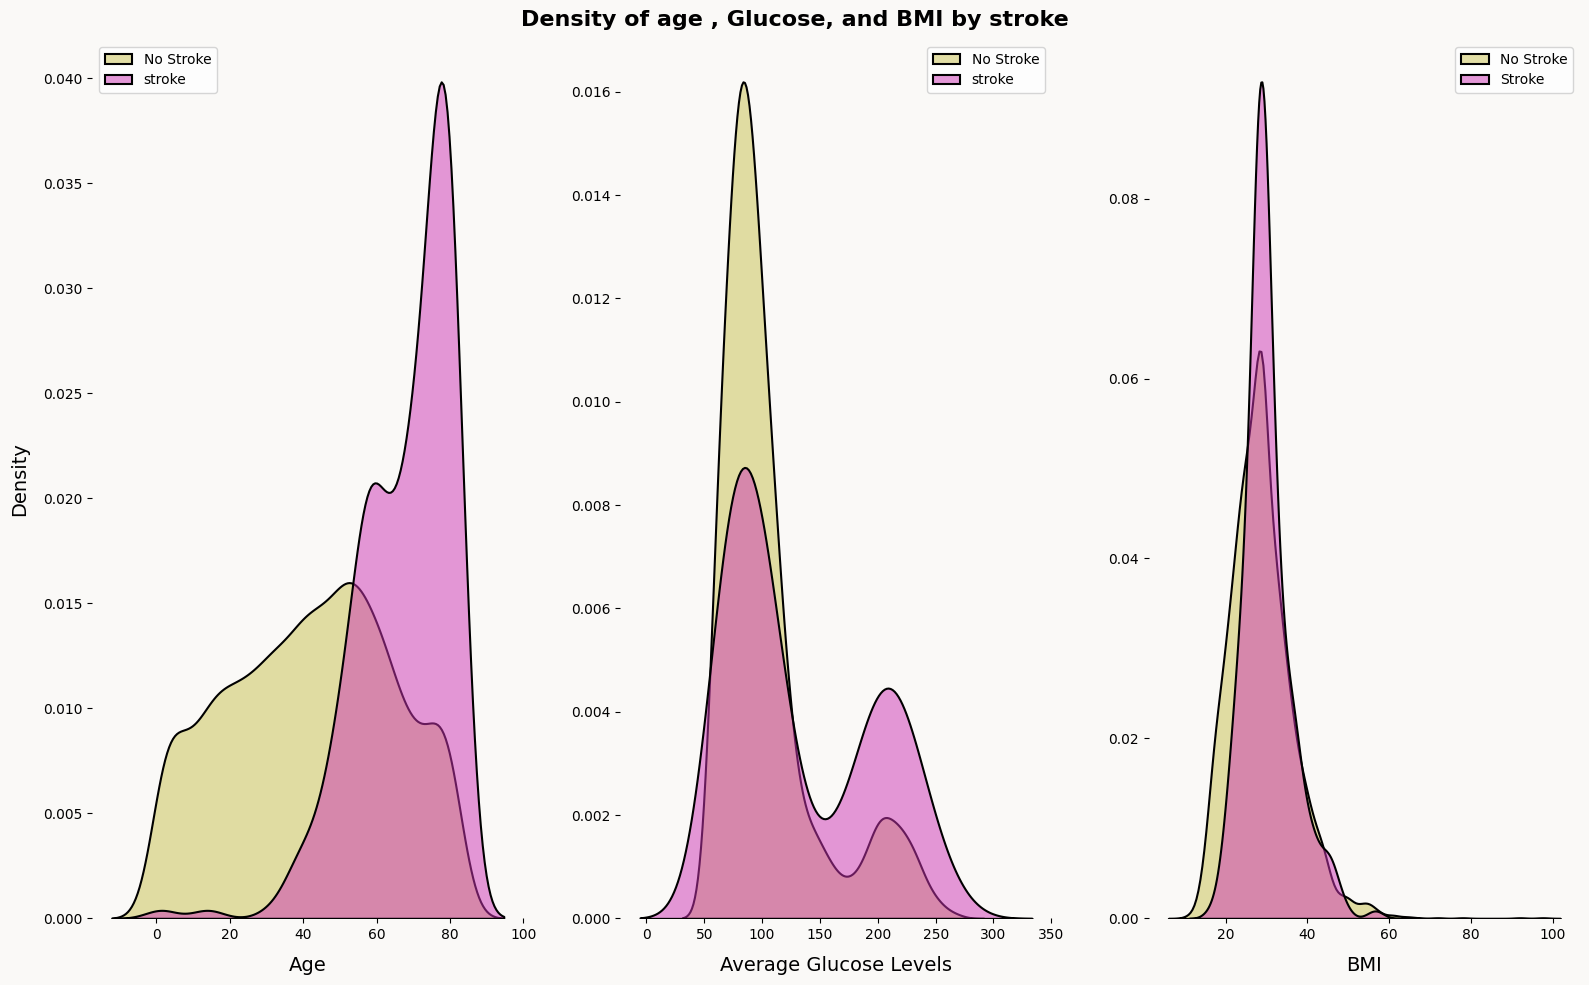

In [ ]:
fig, (ax1, ax2 , ax3) = plt.subplots(1 , 3 , figsize =(16,10))
fig.patch.set_facecolor('#faf9f7')

for i in ( ax1 , ax2 ,ax3):
  i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke']==0],
    ax = ax1,
    color = "#c8c14f" ,
    fill = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
    )
sns.kdeplot(
    df['age'][df['stroke']==1],
    ax=ax1,
    color = "#cd34b5",
    fill = True,
    alpha =0.5,
    linewidth =1.5,
    ec = 'black'
)
ax1.legend(['No Stroke' , 'stroke'] , loc = 'upper left')
ax1.set_xlabel('Age' , fontsize=14 , labelpad =10)
ax1.set_ylabel('Density' , fontsize = 14 , labelpad =10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke']==0],
    ax = ax2,
    color = '#c8c14f',
    alpha=0.5,
    fill =True,
    linewidth =1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke']==1],
    ax = ax2,
    color = '#cd34b5',
    alpha=0.5,
    fill =True,
    linewidth =1.5,
    ec = 'black'
)
ax2.legend(['No Stroke', 'stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14 , labelpad = 10)
ax2.set_ylabel(' ')

sns.kdeplot(
    df['bmi'][df['stroke']==0],
    ax =ax3,
    color = '#c8c14f',
    alpha=0.5,
    fill = True,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke']==1],
    ax = ax3,
    color = "#cd34b5",
    fill = True,
    alpha= 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI' , fontsize = 14 , labelpad =10)
ax3.set_ylabel('')

plt.suptitle('Density of age , Glucose, and BMI by stroke' , fontsize = 16, fontweight ='bold')
for i in (ax1 , ax2 , ax3):
  for j in ['top' , 'left' , 'bottom' , 'right']:
     i.spines[j].set_visible(False)

fig.tight_layout()

#Distribution of Stroke

Text(0.5, 1.0, 'Percentage of Strokes')

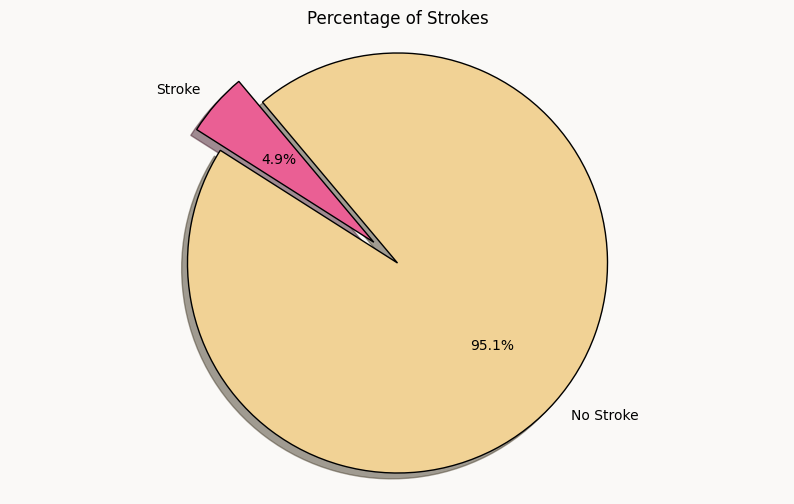

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['Stroke', 'No Stroke']
colors = ["#ea5f94","#f1d295"]
sizes = sizes = [df['stroke'].value_counts()[1], df['stroke'].value_counts()[0]]  # 1 = Stroke, 0 = No Stroke

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 130,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
)
plt.axis('equal')
plt.title('Percentage of Strokes')

#Encoding of categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = labelencoder.fit_transform(df[col])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


#Correlation between features

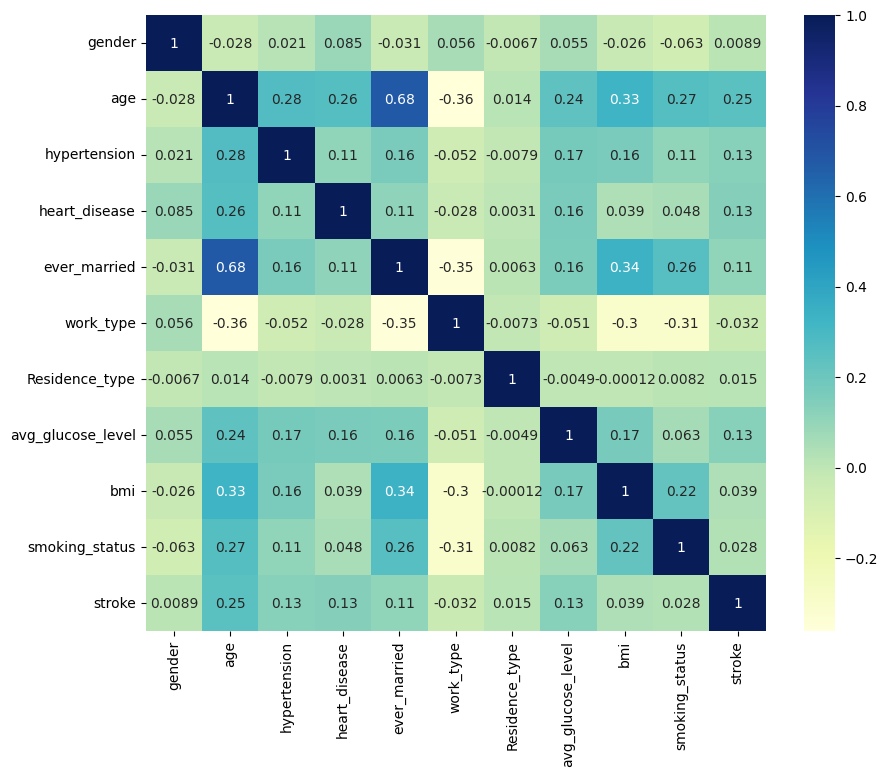

In [ ]:
plt.subplots(figsize = (10,8))
sns.heatmap(data = df.corr(), annot = True , cmap = "YlGnBu")
plt.show()

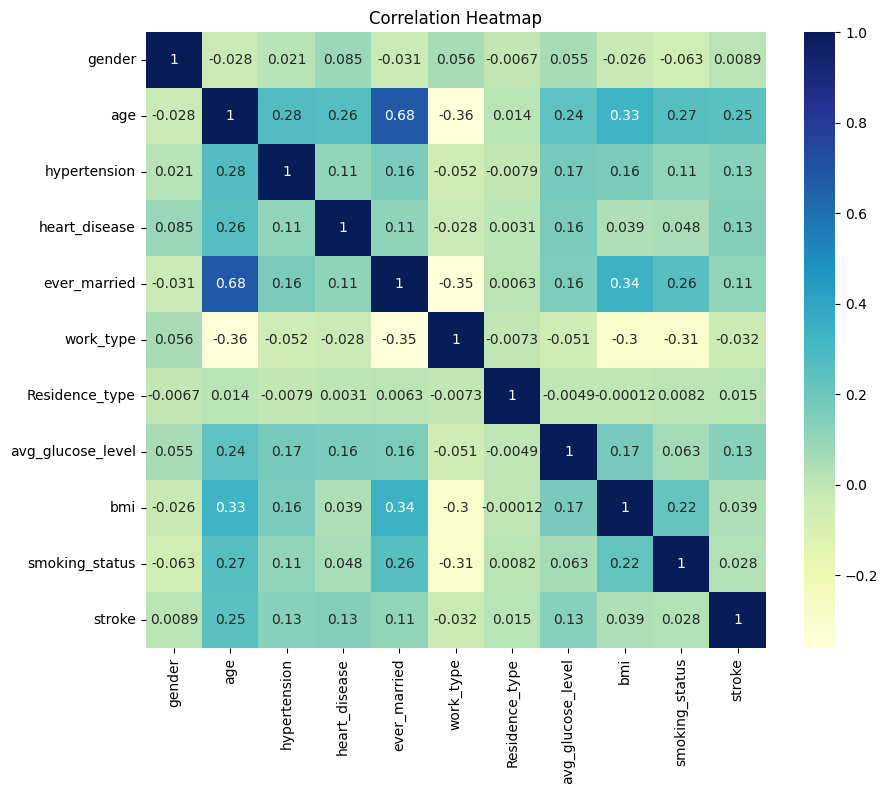

In [ ]:
plt.figure(figsize=(10, 8))  # This is enough
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


#Oversampling

In [ ]:
X =df.iloc[: , : -1].values
y = df.iloc[: , -1].values

In [ ]:
!pip install imbalanced-learn  --upgrade
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
import imblearn


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_os , y_os = oversampler.fit_resample(X,y)

In [ ]:
len(X_os)

9722

In [ ]:
len(y_os)

9722

In [ ]:
acc = []
f1 = []
precision = []
recall = []
roc_auc = []

#Train test split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_os , y_os , test_size = 0.3, stratify = y_os)

#Models

#Decision tree **classifier**

In [ ]:
model1 = DecisionTreeClassifier()


In [ ]:
model1.fit(X_train , y_train)
y_pred1 = model1.predict(X_test)

acc1=accuracy_score(y_test , y_pred1)
f1_1 = f1_score(y_test , y_pred1)
pre1= precision_score(y_test, y_pred1)
rec1= recall_score(y_test , y_pred1)
roc1 = roc_auc_score(y_test , y_pred1)

print("accuracy_score of Model-1 =",acc1)
print("f1_score of Model-1 =",f1_1)
print("precision_score of Model-1 =",pre1)
print("recall_score of Model-1 =",rec1)
print("roc_auc score of Model-1=" , roc1)

accuracy_score of Model-1 = 0.9698320191978059
f1_score of Model-1 = 0.9707057256990679
precision_score of Model-1 = 0.943078913324709
recall_score of Model-1 = 1.0
roc_auc score of Model-1= 0.969842357779301


#Random Forest Classifier

In [ ]:
model2 =RandomForestClassifier(random_state = 42)

In [ ]:
model2.fit(X_train , y_train)
y_pred2 = model2.predict(X_test)

acc2 = accuracy_score(y_test , y_pred2)
f1_2 = f1_score(y_test ,  y_pred2)
pre2 = precision_score(y_test , y_pred2)
rec2 = recall_score(y_test , y_pred2)
roc2 = roc_auc_score(y_test , y_pred2)

print("accuracy_score of Model -2=" , acc2)
print("f1_score of Model-2 =", f1_2)
print("precison_score of Model-2 =", pre2)
print("recall_score of Model-2=", rec2)
print("roc_auc score of Model-2=",roc2)

accuracy_score of Model -2= 0.9897154610901612
f1_score of Model-2 = 0.9898167006109979
precison_score of Model-2 = 0.9798387096774194
recall_score of Model-2= 1.0
roc_auc score of Model-2= 0.9897189856065798


#XGB Classifier

In [ ]:
model3 = XGBClassifier()

In [ ]:
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

acc3 = accuracy_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
pre3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
roc3 = roc_auc_score(y_test, y_pred3)

print("accuracy_score of Model-3=", acc3)
print("f1_score of Model-3=", f1_3)
print("precision_score of Model-3=", pre3)
print("recall_score of Model-3=", rec3)
print("roc_auc score of Model-3=", roc3)

accuracy_score of Model-3= 0.9684607473431608
f1_score of Model-3= 0.9694148936170213
precision_score of Model-3= 0.9406451612903226
recall_score of Model-3= 1.0
roc_auc score of Model-3= 0.9684715558601782


#LGBM Classifier

In [ ]:
model4 = LGBMClassifier()

In [ ]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

acc4 = accuracy_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)
pre4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
roc4 = roc_auc_score(y_test, y_pred4)

print("accuracy_score of Model-4=", acc4)
print("f1_score of Model-4=", f1_4)
print("precision_score of Model-4=", pre4)
print("recall_score of Model-4=", rec4)
print("roc_auc score of Model-4=", roc4)

[LightGBM] [Info] Number of positive: 3403, number of negative: 3402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 6805, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500073 -> initscore=0.000294
[LightGBM] [Info] Start training from score 0.000294
accuracy_score of Model-4= 0.951319849160096
f1_score of Model-4= 0.9535644211903205
precision_score of Model-4= 0.91125
recall_score of Model-4= 1.0
roc_auc score of Model-4= 0.9513365318711446


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#Logistic Regression

In [ ]:
model5 = LogisticRegression()

In [ ]:
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

acc5 = accuracy_score(y_test, y_pred5)
f1_5 = f1_score(y_test, y_pred5)
pre5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
roc5 = roc_auc_score(y_test, y_pred5)

print("accuracy_score of Model-5=", acc5)
print("f1_score of Model-5=", f1_5)
print("precision_score of Model-5=", pre5)
print("recall_score of Model-5=", rec5)
print("roc_auc score of Model-5=", roc5)

accuracy_score of Model-5= 0.7744257799108674
f1_score of Model-5= 0.7808127914723517
precision_score of Model-5= 0.7590673575129534
recall_score of Model-5= 0.803840877914952
roc_auc score of Model-5= 0.7744358604790661


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#SVC  Classifier

In [ ]:
model6 = SVC(kernel = 'rbf')

In [ ]:
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

acc6 = accuracy_score(y_test, y_pred6)
f1_6 = f1_score(y_test, y_pred6)
pre6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
roc6 = roc_auc_score(y_test, y_pred6)

print("accuracy_score of Model-6=", acc6)
print("f1_score of Model-6=", f1_6)
print("precision_score of Model-6=", pre6)
print("recall_score of Model-6=", rec6)
print("roc_auc score of Model-6=", roc6)

accuracy_score of Model-6= 0.7788824134384642
f1_score of Model-6= 0.7922705314009661
precision_score of Model-6= 0.7468123861566485
recall_score of Model-6= 0.8436213991769548
roc_auc score of Model-6= 0.7789045995199373


#Hyper-Parameter Tuning (using GridSearchCV)

#Decision Tree Classifier(with GridSearch)

In [ ]:
model7 = DecisionTreeClassifier()

params = {"max_depth" : [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
          "min_samples_leaf":[1,3,4,5,6,7,8,9],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70] }

clf = GridSearchCV(estimator=model7,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", (-1)*(-clf.best_score_))

Fitting 2 folds for each of 896 candidates, totalling 1792 fits
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6; total time=   0.0s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=7; total time=   0.0s
[CV] END max_depth=3, max_leaf_nod

In [ ]:
model7 = DecisionTreeClassifier(max_depth = 24, max_leaf_nodes = None, min_samples_leaf = 1)


In [ ]:
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)

acc7 = accuracy_score(y_test, y_pred7)
f1_7 = f1_score(y_test, y_pred7)
pre7 = precision_score(y_test, y_pred7)
rec7 = recall_score(y_test, y_pred7)
roc7 = roc_auc_score(y_test, y_pred7)

print("accuracy_score of Model-7 =", acc7)
print("f1_score of Model-7 =", f1_7)
print("precision_score of Model-7 =", pre7)
print("recall_score of Model-7 =", rec7)
print("roc_auc score of Model-7 =", roc7)

accuracy_score of Model-7 = 0.9718889269797737
f1_score of Model-7 = 0.9726484322881921
precision_score of Model-7 = 0.9467532467532468
recall_score of Model-7 = 1.0
roc_auc score of Model-7 = 0.9718985606579849


#Random Forest Classifier(with Grid Search)

In [ ]:
model8 = RandomForestClassifier()

params = {'max_depth': [5,9,11,13,15,17,19,21,23,25],
          'n_estimators': [10,30,50,70,90,100,200,300],
          'max_leaf_nodes': [10,30,50,70,None]}

clf = GridSearchCV(estimator=model8,
                   param_grid=params,
                   scoring='accuracy',
                   verbose=2, cv = 2)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Highest Accuracy: ", -1*(-clf.best_score_))

Fitting 2 folds for each of 400 candidates, totalling 800 fits
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.2s
[CV] END ....max_depth=5, max_leaf_nodes=10, n_estimators=90; total time=   0.3s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=5, max_leaf_nodes=10, n_